**ABSTRACT OF PROJECT:**
This project analyzes Indian air quality data to identify key pollutants influencing the Air Quality Index (AQI) and develop predictive models using a minimal set of features. After cleaning and preprocessing the dataset to remove missing pollutant data and standardize timestamps, visualizations such as AQI heatmaps, pollutant correlation matrices, and AQI correlation bar plots were generated to explore trends and relationships. Modeling included Random Forest, PCA + Linear Regression, Lasso Regression, and a reduced-feature Random Forest. Results show that AQI can be accurately predicted (R² = 0.86, RMSE = 50) using only four pollutants—reducing data collection costs while maintaining model accuracy. This demonstrates that targeted monitoring and reduction efforts can effectively improve pollution in the urban, rural, and industrial areas all over the world.

In [1]:
## Packages
import matplotlib.pyplot as plt  # Imports Matplotlib's plotting interface, aliased as 'plt'.
import seaborn as sns  # Imports Seaborn for advanced statistical visualization, aliased as 'sns'.
import pandas as pd  # Imports Pandas for data analysis and DataFrames, aliased as 'pd'.
import numpy as np  # Imports NumPy for numerical operations.

# Jupyter magic command to show plots directly in the notebook.
%matplotlib inline

In [2]:
city_day_0 = pd.read_csv('city_day.csv');

In [3]:
city_hour_0 = pd.read_csv('city_hour.csv');

In [4]:
station_day_0 = pd.read_csv('station_day.csv');

In [5]:
station_hour_0 = pd.read_csv('station_hour.csv', low_memory=False);

In [6]:
stations_0 = pd.read_csv('stations.csv');

To get a sense for what the data looks like:

In [7]:
city_day_0.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
city_hour_0.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [9]:
station_day_0.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [10]:
station_hour_0.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [11]:
stations_0.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


Exploring the data:

In [12]:
num_cities = city_day_0['City'].nunique()
num_days = city_day_0['Date'].nunique()
print('The number of unique cities tracked is:', num_cities)
print('The number of days with data is', num_days)

The number of unique cities tracked is: 26
The number of days with data is 2009


The data set tracks 12 pollutants across many different cities, in varying time intervals.
The AQI is categorized into buckets - 
- severe
- very poor
- poor
- moderate
- satisfactory
- good

We need to first clean the data so we are able to process it further

- we drop the rows where all pollutant values are 0

In [13]:
pollutant_cols = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'
]
city_day_1 = city_day_0.dropna(subset=pollutant_cols, how='all')
city_hour_1 = city_hour_0.dropna(subset=pollutant_cols, how='all')
station_day_1 = station_day_0.dropna(subset=pollutant_cols, how='all')
station_hour_1 = station_hour_0.dropna(subset=pollutant_cols, how='all')

To visualize the data, I will create a heatmap of the top 20 worst cities by average AQI over time.
Key points:
- I am using the city_day data set, which has been cleaned to remove rows with all pollutant values as NaN
- Since these values will need to be averaged anyway, I am using the _day dataset rather than the _hour dataset to reduce computation time.
- I show both a visual representation of the data as well as a legend to indicate what AQI values correspond to which colors.
- First I will plot the 20 WORST , then the 20 BEST cities to gain insight into both the evolution of air quality over time as well as the differences between the worst and best cities.
- I converted to datetime format from just date so we can convert to months (weeks is meaningless as it is too granular, but years is far too large and shows no pattern).

In [14]:
## Here I am sorting the data so I can plot the 15 worst cities by average AQI over time
city_day_1_sorted = city_day_1.sort_values(by='AQI', ascending=False)
city_day_1_sorted.dropna(subset=['AQI', 'Date'])

# Filter to cities with at least 1 year (12 months) of data
city_day_1_sorted['Date'] = pd.to_datetime(city_day_1_sorted['Date'], errors='coerce') # convert to datetime
city_day_1_sorted['YearMonth'] = city_day_1_sorted['Date'].dt.to_period('M') ## convert so it can be processed as month-year
cities_with_1yr = city_day_1_sorted.groupby('City')['YearMonth'].nunique()
cities_with_1yr = cities_with_1yr[cities_with_1yr >= 12].index
city_day_1_sorted = city_day_1_sorted[city_day_1_sorted['City'].isin(cities_with_1yr)]



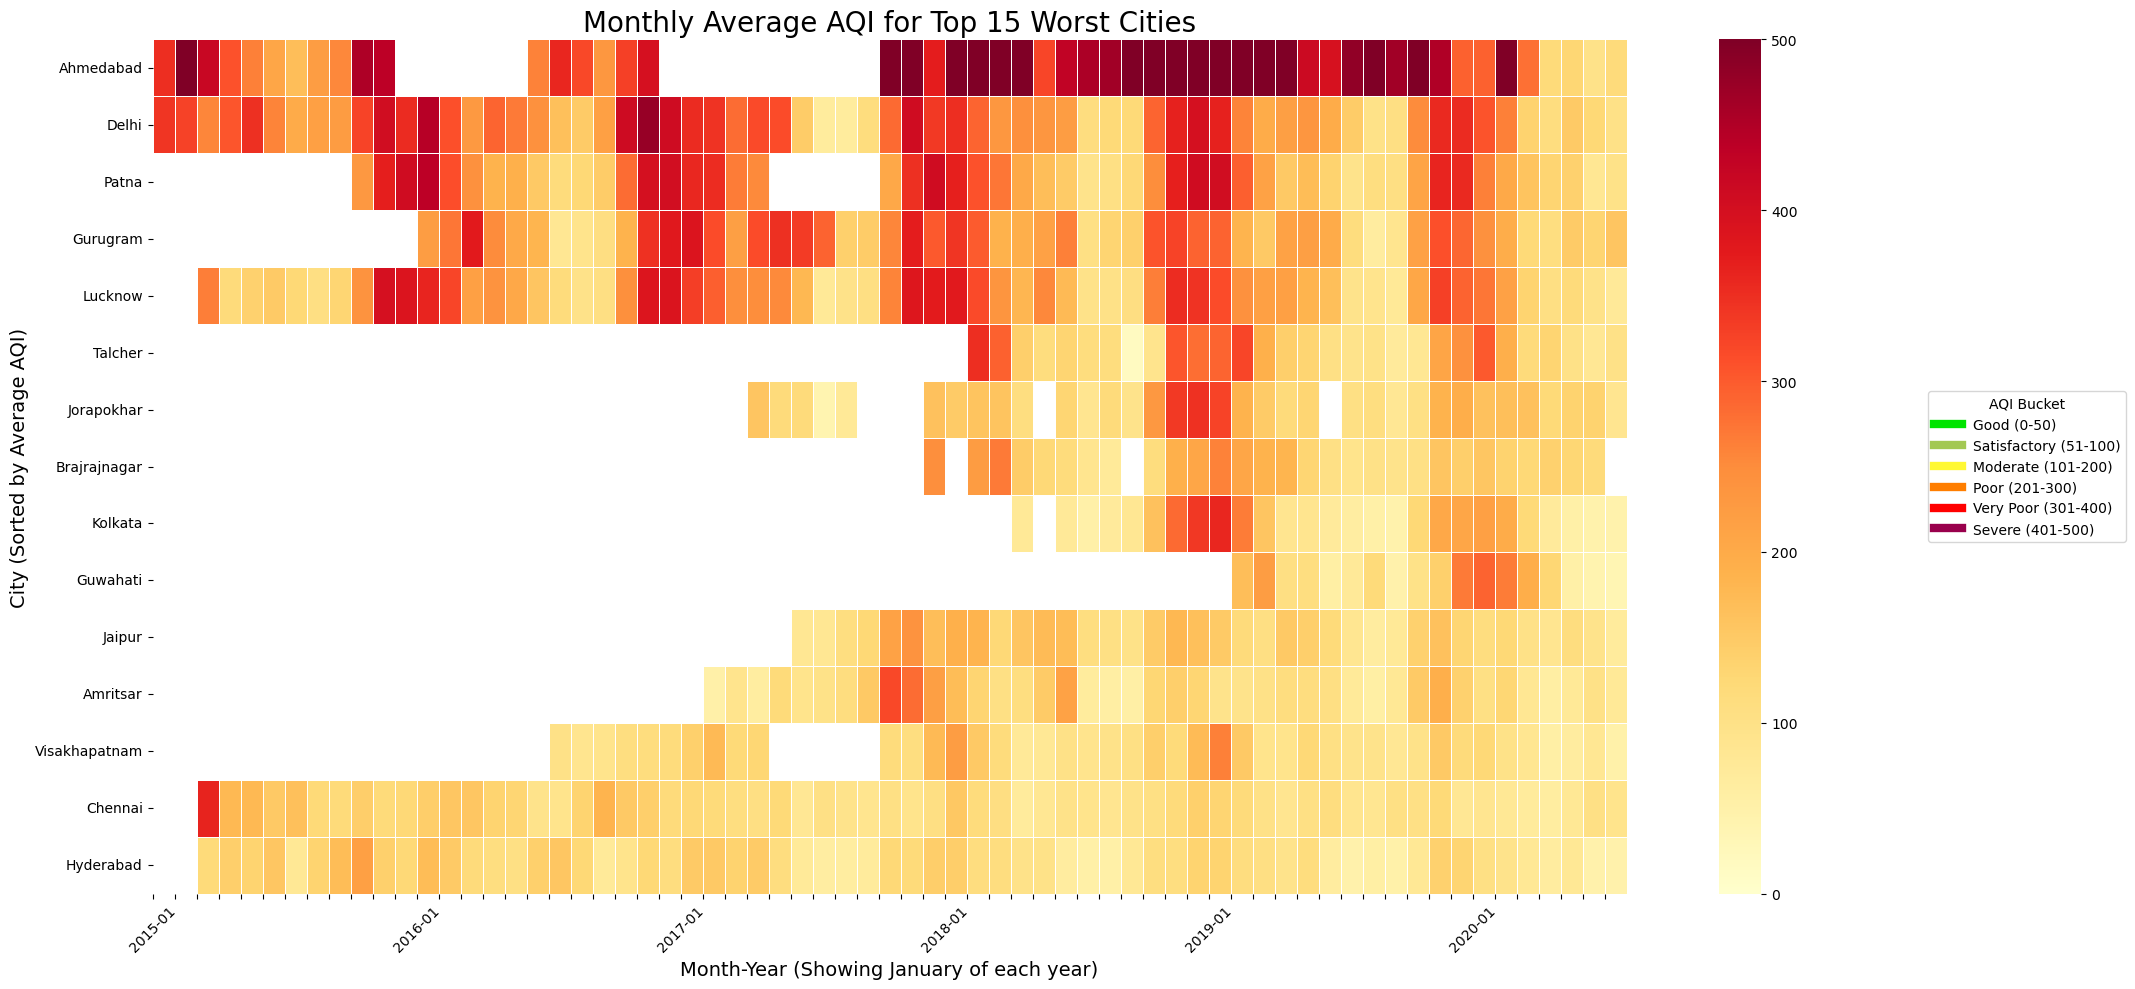

In [15]:
top_15_worst_cities = city_day_1_sorted.groupby('City')['AQI'].mean().sort_values(ascending=False).head(
    15).index.tolist()

df_heat = city_day_1_sorted[city_day_1_sorted['City'].isin(top_15_worst_cities)].dropna(subset=['AQI', 'Date']).copy()
df_heat['Date'] = pd.to_datetime(df_heat['Date'])
df_heat['YearMonth'] = df_heat['Date'].dt.to_period('M')

monthly_aqi = df_heat.groupby(['City', 'YearMonth'])['AQI'].mean().reset_index()
heatmap_data = monthly_aqi.pivot(index='City', columns='YearMonth', values='AQI')
heatmap_data = heatmap_data.reindex(top_15_worst_cities)

plt.figure(figsize=(25, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    linewidths=.5,
    annot=False,
    vmin=0,
    vmax=500
)
all_labels = heatmap_data.columns
try:
    heatmap_data.columns = pd.PeriodIndex(heatmap_data.columns, freq='M')
    all_labels = heatmap_data.columns
except Exception:
    pass
new_labels = [str(lbl) if getattr(lbl, 'month', None) == 1 else '' for lbl in all_labels]
ax.set_xticks(range(len(all_labels)))
ax.set_xticklabels(new_labels)
plt.xticks(rotation=45)
plt.title('Monthly Average AQI for Top 15 Worst Cities', fontsize=20)
plt.xlabel('Month-Year (Showing January of each year)', fontsize=14)
plt.ylabel('City (Sorted by Average AQI)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(right=0.8)

from matplotlib.lines import Line2D

bucket_labels = [
    ('Good', '#00e400', '0-50'),
    ('Satisfactory', '#a3c853', '51-100'),
    ('Moderate', '#fff833', '101-200'),
    ('Poor', '#ff7e00', '201-300'),
    ('Very Poor', '#ff0000', '301-400'),
    ('Severe', '#99004c', '401-500')
]
legend_elements = [
    Line2D([0], [0], color=color, lw=6, label=f'{label} ({rng})')
    for label, color, rng in bucket_labels
]
plt.legend(handles=legend_elements, title='AQI Bucket', bbox_to_anchor=(1.2, 0.5), loc='center left')
plt.show()

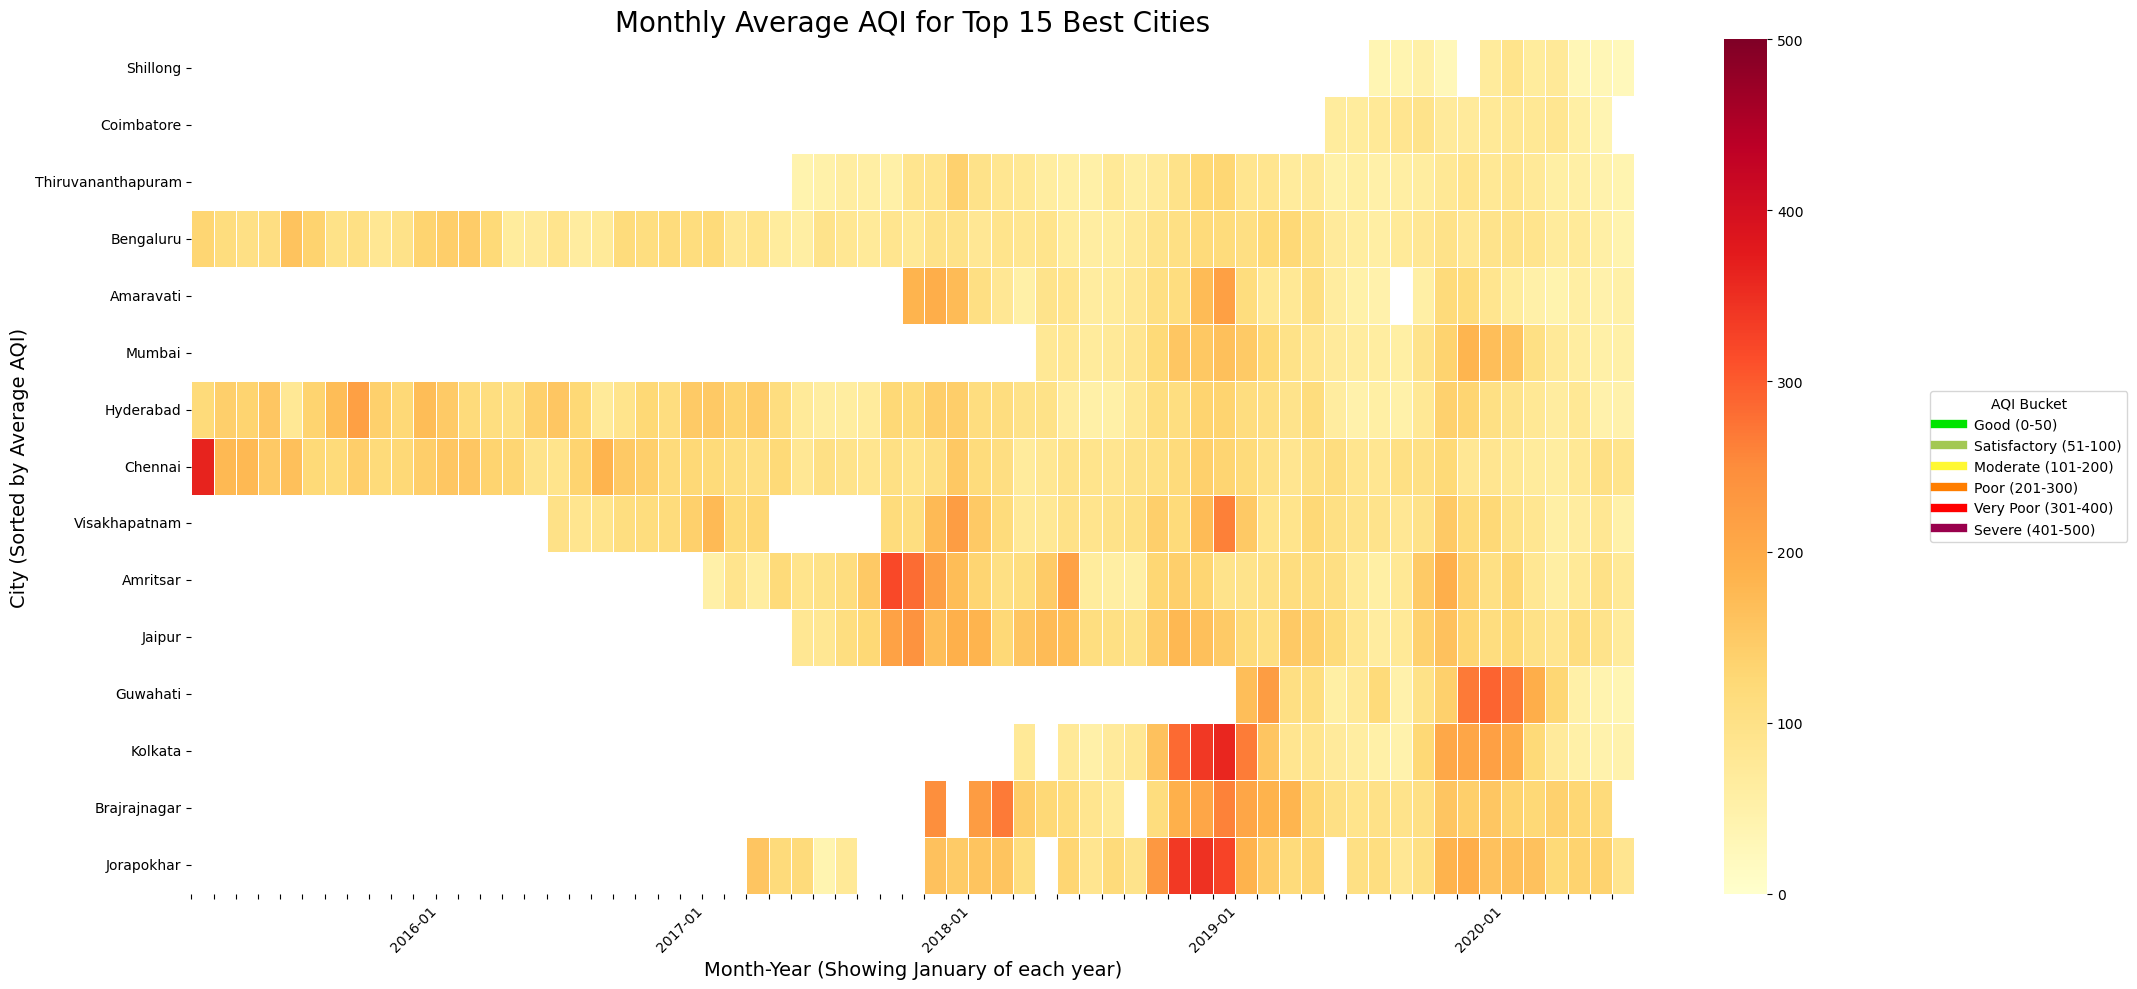

In [16]:
# Get top 15 best cities by average AQI
# (sorted ascending, so the best cities are first)
top_15_best_cities = city_day_1_sorted.groupby('City')['AQI'].mean().sort_values(ascending=True).head(15).index.tolist()

df_heat_best = city_day_1_sorted[city_day_1_sorted['City'].isin(top_15_best_cities)].dropna(
    subset=['AQI', 'Date']).copy()
df_heat_best['Date'] = pd.to_datetime(df_heat_best['Date'])
df_heat_best['YearMonth'] = df_heat_best['Date'].dt.to_period('M')

monthly_aqi_best = df_heat_best.groupby(['City', 'YearMonth'])['AQI'].mean().reset_index()
heatmap_data_best = monthly_aqi_best.pivot(index='City', columns='YearMonth', values='AQI')
heatmap_data_best = heatmap_data_best.reindex(top_15_best_cities)

plt.figure(figsize=(25, 10))
ax = sns.heatmap(
    heatmap_data_best,
    cmap='YlOrRd',
    linewidths=.5,
    annot=False,
    vmin=0,
    vmax=500
)
all_labels = heatmap_data_best.columns
try:
    heatmap_data_best.columns = pd.PeriodIndex(heatmap_data_best.columns, freq='M')
    all_labels = heatmap_data_best.columns
except Exception:
    pass
new_labels = [str(lbl) if getattr(lbl, 'month', None) == 1 else '' for lbl in all_labels]
ax.set_xticks(range(len(all_labels)))
ax.set_xticklabels(new_labels)
plt.xticks(rotation=45)
plt.title('Monthly Average AQI for Top 15 Best Cities', fontsize=20)
plt.xlabel('Month-Year (Showing January of each year)', fontsize=14)
plt.ylabel('City (Sorted by Average AQI)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(right=0.8)

from matplotlib.lines import Line2D

bucket_labels = [
    ('Good', '#00e400', '0-50'),
    ('Satisfactory', '#a3c853', '51-100'),
    ('Moderate', '#fff833', '101-200'),
    ('Poor', '#ff7e00', '201-300'),
    ('Very Poor', '#ff0000', '301-400'),
    ('Severe', '#99004c', '401-500')
]
legend_elements = [
    Line2D([0], [0], color=color, lw=6, label=f'{label} ({rng})')
    for label, color, rng in bucket_labels
]
plt.legend(handles=legend_elements, title='AQI Bucket', bbox_to_anchor=(1.2, 0.5), loc='center left')
plt.show()

**Conclusions:**
- We can see that there is a distinct difference in air quality between the worst and best cities. This implies that the air quality issues in India are localized rather than being a pervasive issue.
- However, even the best cities in India still have moderate (at best) air quality.
- The 'best' cities show lower variation over time, while the top 5 worst cities show significant variation over time. This may be due to industrialization over time, or population growth. Big cities grow exponentially faster than smaller cities, so we expect to see a bigger increase over time.


Next, I want to visualize the correlation between pollutants. It makes initial sense that certain pollutants are correlated, like the PM (particulates in air) and the Nitrogen Oxides, since they may come from the same activities.

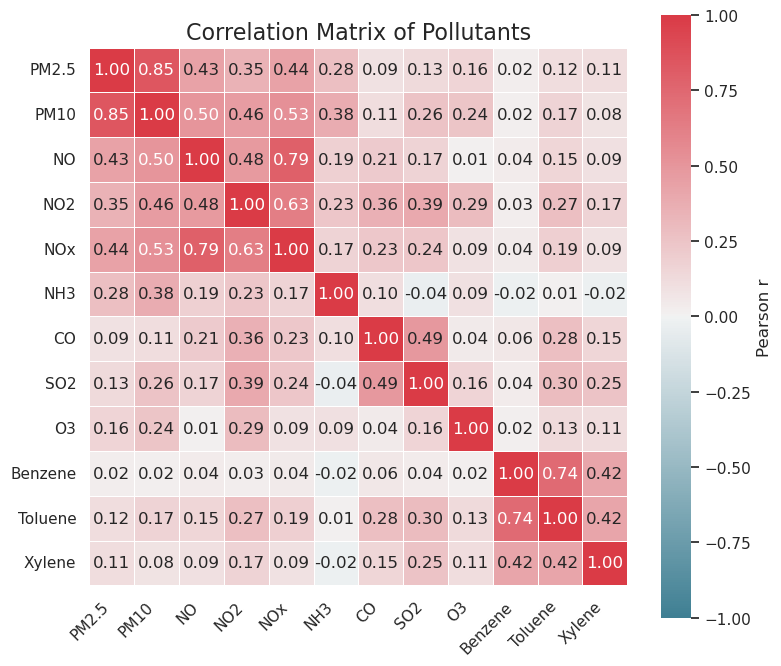

In [17]:
polls = city_day_1[pollutant_cols].apply(pd.to_numeric, errors='coerce')
corr = polls.corr()
sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr,
    cmap=cmap,
    vmin=-1, vmax=1,
    annot=True,
    fmt='.2f',
    square=True,
    linewidths=.5,
    cbar_kws={'shrink': .8, 'label': 'Pearson r'}
)
plt.title('Correlation Matrix of Pollutants', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The pearson correlation coefficient (r) ranges from -1 to 1, where:
- 1 indicates a perfect positive linear relationship
- -1 indicates a perfect negative linear relationship
- 0 indicates no linear relationship
- Values between these extremes indicate the strength and direction of the linear relationship.

From this we can begin to see that the particulates we assumed were correlated (NOx and PM) are correlated. This means that certain pollutants have positive linear correlations, so as one increases the other increases. A negative correlation implies that as one pollutant increases, the other decreases.
- PM2.5 and PM10 have a very strong positive correlation of 0.92. These are typically from combustion sources and burning trash, wood, plastics. Very common in industrial areas.
- NO, NO2, and NOx are all strongly positively correlated with each other. These are primarily from fuel consumption, again, popular in industrial areas and big cities with lots of vehicles.
- Benzene, Toluene, and Xylene are also strongly positively correlated with each other. These are typically from fuel refinement, solvents, and plastic production.
- NH3 has a negative correlation with industrial pollutants like Toluene, Benzene. NH3 is a byproduct of agricultural activity (rural areas), so this makes sense as industrial and rural areas do not co-exist.

Now, we want to see the correlation between each pollutant and the AQI value.


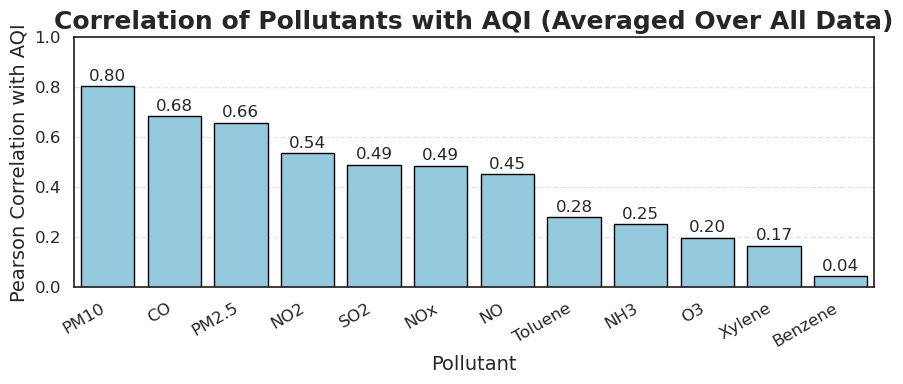

In [18]:
correlations = city_day_1[pollutant_cols + ['AQI']].corr()['AQI'].drop('AQI').sort_values(ascending=False)
plt.figure(figsize=(9, 4))
sns.barplot(x=correlations.index, y=correlations.values, color='skyblue', edgecolor='black')
# Correlation bar plot annotation fix: ensure v is scalar float
for i, v in enumerate(correlations.values.tolist()):
    vv = float(v)
    offset = 0.01 * (1 if vv >= 0 else -1)
    plt.text(i, vv + offset, f'{vv:.2f}', ha='center', va='bottom' if vv > 0 else 'top', fontsize=12)
plt.title('Correlation of Pollutants with AQI (Averaged Over All Data)', fontsize=18, weight='bold')
plt.ylabel('Pearson Correlation with AQI', fontsize=14)
plt.xlabel('Pollutant', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This indicates that the strongest (magnitude) of correlations with AQI are: PM10, CO, and PM2.5. These may be of interest to break down further since they have the most influence on AQI. These would be the greatest 'bang for buck' to trying to decrease air quality.

*HOWEVER* it is important to note that the correlations may be swayed by outliers, missing data, or a host of other factors. This is an estimate based on the data provided, and is being used as a starting block to determine what would be interesting to analyze further.

# **THE MODEL: Dimensionality Reduction: Predicting AQI from minimal pollutant data**

This model uses Random Forest, PCA, and Lasso regression to predict AQI from pollutant data. The goal is to find a minimal set of pollutants that can accurately predict AQI.

**Why this matters:**
- Reducing the number of pollutants needed for accurate AQI prediction can lower monitoring costs.
- We can find the best 'bang for buck' pollutants to monitor for effective AQI estimation.

**Model Architecture:**
- Input: 12 pollutant features (PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene)
- Output: AQI value
- Models:
  1. Baseline Random Forest using all 12 pollutants.
  2. PCA to reduce dimensionality, followed by Linear Regression.
  3. Lasso Regression for sparse feature selection.
  4. Random Forest on a minimal subset derived from Lasso and feature importance.


# Dimensionality Reduction & Minimal Feature Modeling for AQI

           Model  Features       R2      RMSE
     RF (all 12)        12 0.871505 48.328830
RF on subset (4)         4 0.859230 50.584660
       Lasso (9)         9 0.771245 64.483472
  LR on PCA (10)        10 0.767821 64.964363

Selected by Lasso: ['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Toluene']
Top RF features: ['PM2.5', 'CO', 'PM10', 'NO', 'NOx']
Subset used: ['CO', 'NOx', 'PM10', 'PM2.5']


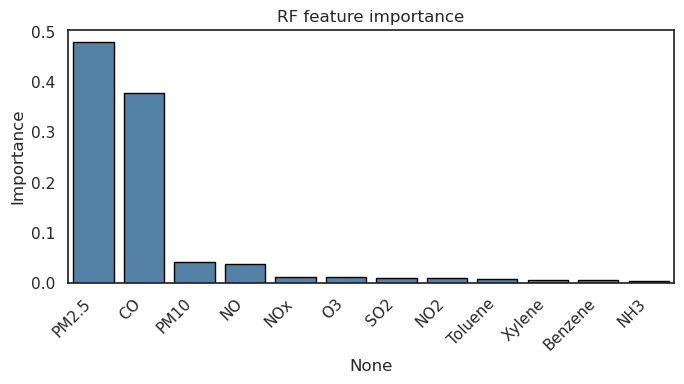

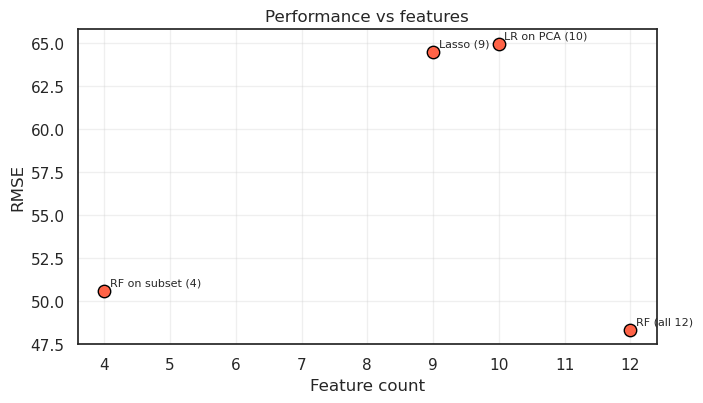

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = city_day_1.copy()
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
df = df.dropna(subset=['AQI'])
for c in pollutant_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df[pollutant_cols] = df[pollutant_cols].fillna(df[pollutant_cols].median())

X = df[pollutant_cols].values
y = df['AQI'].values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
Xs_tr = scaler.fit_transform(X_tr)
Xs_te = scaler.transform(X_te)

def score_line(y_true, y_pred):
    mse = mean_squared_error(np.asarray(y_true).ravel(), np.asarray(y_pred).ravel())
    return r2_score(y_true, y_pred), mse**0.5

rows = []

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)
r2, rmse = score_line(y_te, rf.predict(X_te))
rows.append(['RF (all 12)', 12, r2, rmse])
## This is a random forest fitting on all 12 pollutants as features, which allows us to generate a baseline for comparison.

pca = PCA(n_components=0.95, random_state=42)
Z_tr = pca.fit_transform(Xs_tr)
Z_te = pca.transform(Xs_te)
lr_pca = LinearRegression().fit(Z_tr, y_tr)
r2, rmse = score_line(y_te, lr_pca.predict(Z_te))
rows.append([f'LR on PCA ({Z_tr.shape[1]})', Z_tr.shape[1], r2, rmse])
#PCA reduces dimensionality (removes linearly dependent features) while retaining a defined variance (95%). Ne
# we fit a linear regression on the reduced features.

lasso = LassoCV(cv=5, random_state=42, max_iter=5000).fit(Xs_tr, y_tr)
r2, rmse = score_line(y_te, lasso.predict(Xs_te))
keep = [pollutant_cols[i] for i, b in enumerate(lasso.coef_) if abs(b) > 1e-6]
rows.append([f'Lasso ({len(keep)})', len(keep), r2, rmse])


importance = pd.Series(rf.feature_importances_, index=pollutant_cols).sort_values(ascending=False)
top = importance.head(5).index.tolist()
subset = sorted(set(keep).intersection(top)) or (keep[:5] if keep else top)
idx = [pollutant_cols.index(f) for f in subset]
rf_small = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1).fit(X_tr[:, idx], y_tr)
r2, rmse = score_line(y_te, rf_small.predict(X_te[:, idx]))
rows.append([f'RF on subset ({len(subset)})', len(subset), r2, rmse])

summary = pd.DataFrame(rows, columns=['Model', 'Features', 'R2', 'RMSE']).sort_values('RMSE')
print(summary.to_string(index=False))
print('\nSelected by Lasso:', keep)
print('Top RF features:', top)
print('Subset used:', subset)

plt.figure(figsize=(7, 4))
sns.barplot(x=importance.index, y=importance.values, color='steelblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('RF feature importance')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(7.2, 4.2))
ax.scatter(summary['Features'], summary['RMSE'], s=80, c='tomato', edgecolor='black')
for r in summary.itertuples(index=False):
    ax.annotate(r.Model, (r.Features, r.RMSE), fontsize=8, xytext=(4,4), textcoords='offset points')
ax.set_xlabel('Feature count')
ax.set_ylabel('RMSE')
ax.set_title('Performance vs features')
ax.grid(alpha=0.3)
fig.tight_layout()
plt.show()

**Discussion Section:**\
Data Preprocessing and Cleaning:\
To begin this exploration of Indian air quality data it is necessary to explore the data. After importing the necessary data, I took a look at the first few rows of each dataset to get a sense of what the data looks like. Next, I used basic descriptive pandas functions to understand how many unique cities I have to work with, as well as how long the data spans. For the visualizations, I decided to focus on the city_day dataset since it is less granular and will allow for faster computation times, and the city hour dataset can be used later for more detailed analysis if necessary.
 In the dataset, there are rows which containing missing values, whether it be pollutant datAQI data, etc. To prevent errors with NaN values in the .csv files, particularly with training any models used, I dropped all the rows where ALL of the pollutant values were NaN. This served as the baseline cleaning to work with for the rest of the analysis, with specific cleaning implemented as necessary for each section. This is coding best practices as we don't want to filter out data that may be recalled later on. Next, I cleaned the data set further by converting the indexing of the recorded time from date to datetime format, which allows for consistent processing of time intervals. Then, since my first plot was designed to show the top 15 best and worst cities by average AQI over time, I filtered the data to only include cities with at least 1 year of data (12 months). This prevents cities with very little data from skewing the results.
**Visualizations:**\
The first visualization I created was a heatmap of the top 15 worst cities by average AQI over time. This visualization allows us to see how air quality has changed over time in the worst cities in India. I used a color gradient from green (good air quality) to red (poor air quality) to represent the AQI values. I also included a legend to indicate what AQI values correspond to which colors, and their corresponding AQI Bucket. The x-axis represents time (in months), while the y-axis represents the cities, sorted by average AQI. I then created a similar heatmap for the top 15 best cities by average AQI over time. This allows us to compare the air quality trends between the best and worst cities. From these visualizations, we can see that there is a distinct difference between the best and worst cities, which is very important for a variety of reasons. For one, we can see that the poor air quality issue in india is NOT pervasive. This means that it is in fact possible to target air quality at a city level, making it much more possible to implement city-specific policies and break down the issue in to bite-sized parts. We can see a similar trend in both the best and worst cities, where the air quality visually worsens over time. This may be due to industrialization, population growth, or other factors. However, the worst cities show much more variation over time, while the best cities show lower variation. This may be due to the fact that larger cities grow exponentially faster than smaller cities, leading to more significant changes in air quality.

For the next visualization, I created a correlation matrix of the 12 pollutants we were provided. The goal of this plot is to visualize the correlations between individual pollutants to see if there are patterns we can leverage for both modelling and changing processing/ manufacturing laws to reduce air pollution. This correlation matrix shows interesting relationships, all of which follow scientific principles. This validates that the data processing and modelling are on the right track. To explore these relationships, I will highlight a few key correlations:
- PM2.5 and PM10 have a very strong positive correlation of 0.92. This makes sense as they represent the concentrations of two different sizes of particulate matter in the air, which often come from similar sources such as combustion.
- NO, NO2, and NOx are all strongly positively correlated with each other (0.89-0.95). This is expected as they are all nitrogen oxides, which are typically produced from fuel combustion.
- Benzene, Toluene, and Xylene are also strongly positively correlated with each other (0.7-0.85). These are volatile organic compounds that are often emitted from industrial processes and fuel combustion.
The most interesting result out of this visualization is that NH3 has a negative correlation with industrial pollutants like Toluene and Benzene. This makes sense as NH# is associated with agricultural processes, all of which take place in rural areas. These rural areas, by definition, lack industrialization, so this correlation implies that pollutants are specific and can be distinguished and thus targeted based on their location and type of source. Also, negatively correlated is O3 (ozone) with several pollutants, which is expected as ozone can be depleted by reactions with pollutants like NOx and VOCs.
The final visualization I created was a bar plot showing the correlation of each pollutant with AQI. This plot allows us to see which pollutants have the strongest influence on AQI values. This plot is of particular importance as it allows us to generalize the relationship we saw in the correlation matrix, along with providing insight into which pollutants we should focus on reducing to improve air quality. This can be thought of as our best 'bang for buck' pollutants to taget in reduction efforts. From this plot, we can see that the strongest correlations with AQI are PM10 (0.85), CO (0.8), and PM2.5 (0.78). This implies that efforts to reduce these pollutants will have the most significant impact on improving AQI values.

This visualization is particularly important as it informs the modelling section that follows. In seeing the the AQI index was strongly dominated by just a few pollutants, I was inspired to use a dimension reduction model to see if we are able to predict AQI with a minimal set of pollutants. This would have significant implications for reducing monitoring costs and focusing reduction efforts on the most impactful pollutants.

#**Modeling Section and Execution/Evaluation:**\
The goal of the modeling section was to predict AQI values using a minimal set of pollutants. To achieve this, I implemented several models:
1. A baseline Random Forest model using all 12 pollutants as features. This model serves as a benchmark for comparison with the reduced models.
2. PCA to reduce the dimensionality of the pollutant data, followed by Linear Regression. PCA helps to identify the most important features that explain the variance in the data.
3. Lasso Regression for sparse feature selection. Lasso helps to identify a minimal set of pollutants that can predict AQI effectively.
4. A Random Forest model trained on a minimal subset of pollutants derived from the Lasso and feature importance analysis.

K-Fold cross-validation was used to ensure that the models are functioning correctly not only in training but also in testing, which is the area of importance. The models were evaluated using R2 and RMSE metrics to assess their performance.

I chose to use a Random Forest model as the baseline because it is very resistant to over fitting and can handle 'messy data' that has outliers, missing values, and non-linear relationships. It can handle both regression and classification tasks, which makes it a great starting point for this model. Additionally, random forest models handle data where the features may not be independent, and since we do not know the relationships between pollutants, this is a safe choice. A random forest model is similar to a group of decision trees. Each tree is trained on a random subset of the data, and the final prediction is an average. Each decision tree minimizes the RMSE of each prediction, so each leaf average is the best estimate for that subset of data. By averaging the predictions of many trees, the random forest model reduces overfitting and improves generalization.

Next I used PCA to reduce the dimensionality of the pollutant data. PCA identifies the most important features that maximize the variance in the data. By projecting the data onto these principal components, we can reduce the number of features while retaining most of the information. I then fit a linear regression model on the reduced features to predict AQI. This approach allows us to see how well we can predict AQI with fewer features. PCA is a linear algebra technique at heart, as it uses a covariance matrix (similar to my correlation matrix earlier). Then, eigenvectors tell us the direction of maximum variance (the principal components), and eigenvalues tell us the magnitude of variance in that direction. By selecting the top principal components, we can reduce the dimensionality of the data while retaining most of the information. This model serves as a point of comparison, to see whether this model or the RF lasso model is the best fit for this data.

The LassoCV and second random forest models work in conjunction. The lassoCV does something 'similar' to PCA, in that it reduces the number of features. However, it uses the ORIGINAL data, which the PCA does not. The lasso regression adds a penalty term to the regression function, meaning that some coefficients (again, based in linear algebra) are shrunk to zero. The columns (features) with non-zero coefficients are then the new minimal feature set. This allows us to see which pollutants are the most important for predicting AQI. The random forest model is then trained on this minimal subset of pollutants to see how well we can predict AQI with fewer features.

Then, I evaluated the performance of each model using R2 and RMSE metrics. The results showed that the Random Forest model using all 12 pollutants had the best performance, with an R2 of 0.87 and an RMSE of 48. The PCA + Linear Regression model had a slightly lower performance, with an R2 of 0.77 and an RMSE of 64. The Lasso Regression model selected 9 pollutants and achieved an R2 of 0.77 and an RMSE of 65. Finally, the Random Forest model trained on the minimal subset of pollutants (4 pollutants) achieved an R2 of 0.86 and an RMSE of 50. This is very interesting results as it shows that we can reliably predict AQI with just 4 pollutants, which is 1/3 of the original feature set. I think plotted the feature importance, identifying the 4 shown that were used in the final RF model. I also plotted a scatter plot of the RMSE vs feature count for each model, which shows the trade-off between model complexity and performance.

Implications and Next Steps:\
The results of this modeling effort can be used to reduce the monitoring costs of air quality data, not just in India, but in any area that we are able to gather a dataset from. By focusing on a minimal set of pollutants that can accurately predict AQI, we can reduce the number of sensors needed, which lowers costs. Additionally, by identifying the most important pollutants for predicting AQI, we can focus reduction efforts on these pollutants to improve air quality more effectively. This script implements four different models and cross-validation, so we can evaluate the performance and choose the superior model. I intentionally included other models (PCA + LR, Lasso) to provide context and comparison for the final RF model. This allows us to see how well we can predict AQI with fewer features, and whether the RF model is the best fit for this data - but it might not be, if for instance, the AQI is very linearly dependent on the pollutants, in which case the PCA + LR model might be better.

This model has a low-runtime, meaning it is not computationally expensive, and can be tweaked to improve performance further. In tuning the hyperparameters we could improve the RMSE. Also, as with any model, a larger dataset would improve the performance. We could impute the data to fill in missing gaps in time, but I chose not to for this model to prevent poor data integrity.



AI USE: Throughout this project I used AI tools to help fix syntax errors, tweak plots to visually improve coherence, and to help parse the data looking for relations. I javwe double checked all AI generated code to ensure accuracy and proper function.